In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
df_short_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_1232173pts_08-10_094943',input_type = 'pkl').data_frame


/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:842: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.

/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.



# Determining Optimal Number of Free Params

In [ ]:
df_aic = pd.DataFrame(columns=['ms', 'ns', 'AIC'])
lenscale = [0.25*x for x in range(1,16)]
ms = range(1,8)
for scale in tqdm_notebook(lenscale, desc='scale'):
    for m in tqdm_notebook(ms, desc='ms'):
        cfg_pickle_Opt = cfg_pickle(use_pickle=True, save_pickle=True,
                                     load_name='Cole_Hel', save_name='opt_test', recreate=False)
        cfg_params_Hel_Opt  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=9.2*scale, ms_c1=m, ns_c1=2,
                                         length2=0, ms_c2=0, ns_c2=0,
                                         ks_dict={'k3':768},
                                         bs_tuples=((0.25, 0, -4.6),
                                                    (0.25, 0, 4.6)),
                                         bs_bounds=(0.1, 0.1, 3),
                                         version=1000)
        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_short_cyl,
                                          cfg_geom_Cole_250mm_cyl, cfg_params_Hel_Opt,
                                          cfg_pickle_Opt, cfg_plot_none)
        df_aic = df_aic.append({'length':9.2*scale, 'ms':m, 'AIC':np.log(-ff.result.aic)}, ignore_index=True)
        #do_pickle=False

In [ ]:
from matplotlib.ticker import FormatStrFormatter

df_aic['length'] = df_aic.round({'length':2}).length
ax = sns.heatmap(df_aic.pivot('ms', 'length', 'AIC'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
           cbar_kws={'label': 'log(-AIC)'}, xticklabels=1)
#x_format = ax.xaxis.get_major_formatter()
#x_format.seq = ["{:0.0f}".format(float(s)) for s in x_format.seq]
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.yaxis.set_major_formatter(majorFormatter)
plt.title('Fit Quality per Effective Length')
plt.xlabel('Length (m)', labelpad=15)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solB.pdf', bbox_inches='tight')


# Fit Plots

In [3]:
cfg_pickle_Opt = cfg_pickle(use_pickle=True, save_pickle=True,
                             load_name='Cole_Hel', save_name='opt_test_nolow', recreate=False)
cfg_params_Hel_Opt  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=0, ms_c1=0, ns_c1=0,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':768},
                                 bs_tuples=((0.25, 0, -4.6),
                                            (0.25, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 3),
                                 version=1000)
hmd, ff_no_low = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_short_cyl,
                                  cfg_geom_Cole_250mm_cyl, cfg_params_Hel_Opt,
                                  cfg_pickle_Opt, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -4.6), (0.25, 0, 4.6)), bs_bounds=(0.1, 0.1, 3), version=1000)
`ftol` termination condition is satisfied.
Function evaluations 15, initial cost 8.0738e+03, final cost 8.0672e+01, first-order optimality 1.81e-04.
Elapsed time was 7.91291 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 16
    # data points      = 28800
    # variables        = 13
    chi-square         = 161.34406
    reduced chi-square = 0.00560
    Akaike info crit   = -149290.23632
    Bayesian info crit = -149182.75062
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixe

In [2]:
cfg_pickle_Opt = cfg_pickle(use_pickle=True, save_pickle=True,
                             load_name='solB_best', save_name='solB_best', recreate=True)
cfg_params_Hel_Opt  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=4, ns_c1=2,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':768},
                                 bs_tuples=((0.25, 0, -4.6),
                                            (0.25, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 3),
                                 version=1000)
_, ff_with_low = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_short_cyl,
                                  cfg_geom_Cole_250mm_cyl, cfg_params_Hel_Opt,
                                  cfg_pickle_Opt, cfg_plot_none)

recreating fit with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=4, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -4.6), (0.25, 0, 4.6)), bs_bounds=(0.1, 0.1, 3), version=1000)
Elapsed time was 3.641 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 28800
    # variables        = 0
    chi-square         = 0.00004
    reduced chi-square = 0.00000
    Akaike info crit   = -584194.44566
    Bayesian info crit = -584194.44566
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     4 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -2.625531e-12 (fixed)
    Dh1_0_0

/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:842: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.

/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.



In [8]:
cfg_pickle_Opt2 = cfg_pickle(use_pickle=True, save_pickle=True,
                             load_name='Cole_Hel', save_name='solB_best2', recreate=False)
cfg_params_Hel_Opt2  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=30, ms_h2=4, ns_h2=2,
                                 length1=0, ms_c1=0, ns_c1=0,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':768},
                                 bs_tuples=((0.25, 0, -4.6),
                                            (0.25, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 3),
                                 version=1000)
_, ff_with_low2 = field_map_analysis('fma_opt_test', cfg_data_Cole_250mm_short_cyl,
                                  cfg_geom_Cole_250mm_cyl, cfg_params_Hel_Opt2,
                                  cfg_pickle_Opt2, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=30, ms_h2=4, ns_h2=2, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -4.6), (0.25, 0, 4.6)), bs_bounds=(0.1, 0.1, 3), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 70, initial cost 8.0738e+03, final cost 1.3250e-04, first-order optimality 1.36e-07.
Elapsed time was 55.3564 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 71
    # data points      = 28800
    # variables        = 29
    chi-square         = 0.00026
    reduced chi-square = 0.00000
    Akaike info crit   = -532855.47407
    Bayesian info crit = -532615.69828
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    30 (fixed)
    ms_h2:     4 (fixed)
    ns_h2:     2 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixe

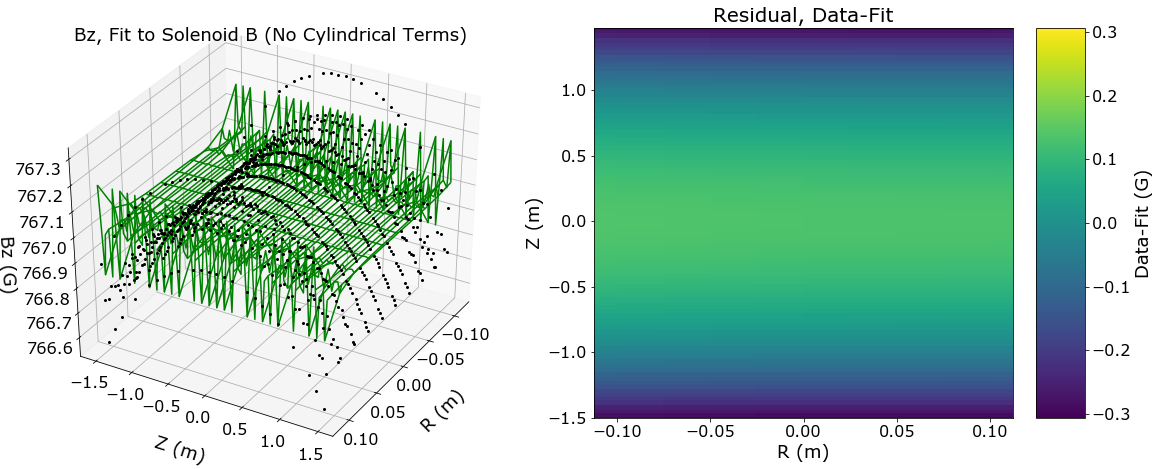

In [5]:
phi=0
fig = mu2e_plot3d(ff_no_low.input_data, 'R', 'Z', 'Bz', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Bz, Fit to Solenoid B (No Cylindrical Terms)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/nolow_bz_B_fit.png')

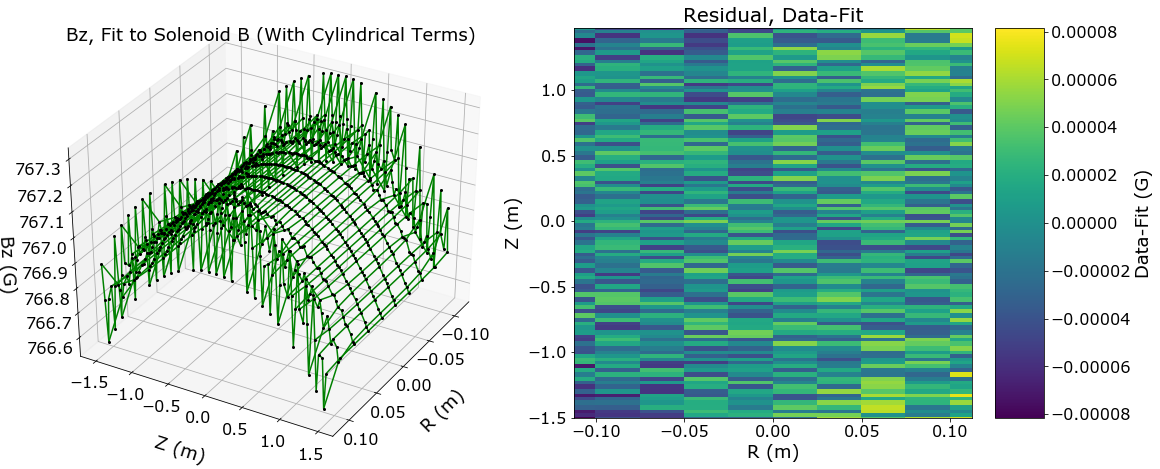

In [9]:
phi=0
fig = mu2e_plot3d(ff_with_low.input_data, 'R', 'Z', 'Bz', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Bz, Fit to Solenoid B (With Cylindrical Terms)', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/withlow_bz_B_fit.png')

# Validation

In [3]:
cfg_pickle_Hel_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_best', save_name='solB_best', recreate=True)
_, ff_fullsim = field_map_analysis('fma_fit_solB', cfg_data_Cole_250mm_short_cyl,
                                  cfg_geom_Cole_250mm_cyl_hg, cfg_params_Hel_Opt,
                                  cfg_pickle_Hel_fs, cfg_plot_none)
df_fs_hel =ff_fullsim.input_data

recreating fit with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=4, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 768}, bs_tuples=((0.25, 0, -4.6), (0.25, 0, 4.6)), bs_bounds=(0.1, 0.1, 3), version=1000)
Elapsed time was 8.16066 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 907200
    # variables        = 0
    chi-square         = 0.00140
    reduced chi-square = 0.00000
    Akaike info crit   = -18409268.97551
    Bayesian info crit = -18409268.97551
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     4 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -2.625531e-12 (fixed)
    

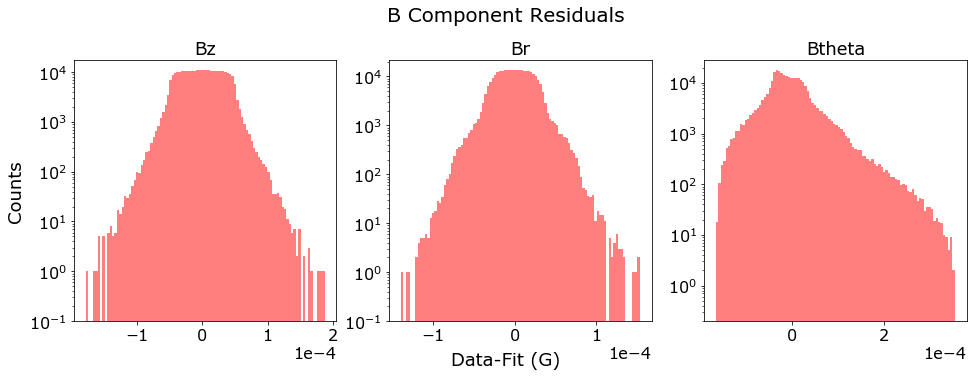

In [4]:
fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
ax = fig.add_subplot(1, 3, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs_hel.Bz-df_fs_hel.Bz_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title('Bz')
ax.set_ylabel('Counts')
ax = fig.add_subplot(1, 3, 2)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs_hel.Br-df_fs_hel.Br_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title('Br')
ax = fig.add_subplot(1, 3, 3)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs_hel.Bphi-df_fs_hel.Bphi_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title('Btheta')
fig.suptitle('B Component Residuals', verticalalignment='bottom')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solB.pdf', bbox_inches='tight')

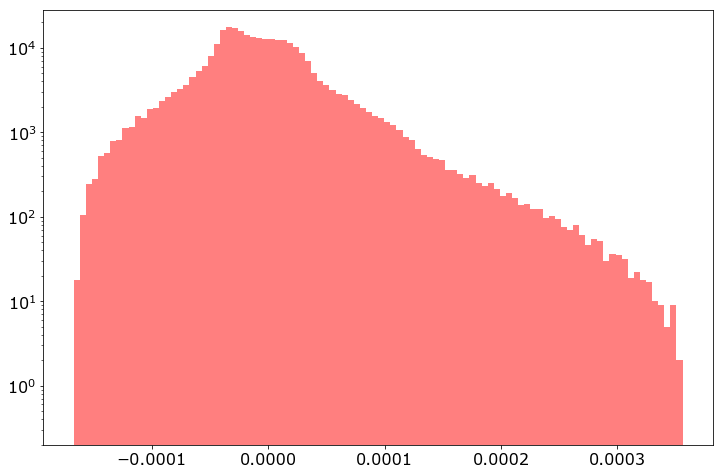

In [18]:
df_fs_trim = df_fs_hel.copy()
df_fs_trim.eval('Bphi_res = Bphi-Bphi_fit', inplace=True)
df_fs_trim = df_fs_trim[['Phi', 'Bphi_res']]
df_gb_mean = df_fs_trim.groupby('Phi').mean()
df_gb_st = df_fs_trim.groupby('Phi').std()
_ = splt.hist(df_fs_trim.Bphi_res, bins=100, log=True, color='r')
plt.plot()

<ErrorbarContainer object of 3 artists>

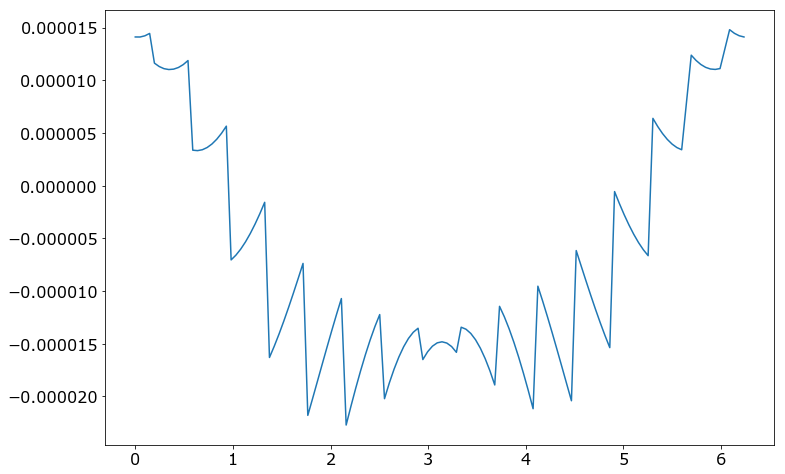

In [28]:
plt.errorbar(df_gb_mean.index, df_gb_mean.Bphi_res)